<a href="https://colab.research.google.com/github/fakiis/Dsp2020/blob/master/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget "https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py"
import thinkdsp as td
signal= td.PinkNoise(beta=1)
wave= signal.make_wave(duration=5,framerate=10000)


--2020-06-05 16:48:53--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48703 (48K) [text/plain]
Saving to: ‘thinkdsp.py.22’

thinkdsp.py.22      100%[===================>]  47.56K  --.-KB/s    in 0.02s   

2020-06-05 16:48:53 (1.87 MB/s) - ‘thinkdsp.py.22’ saved [48703/48703]



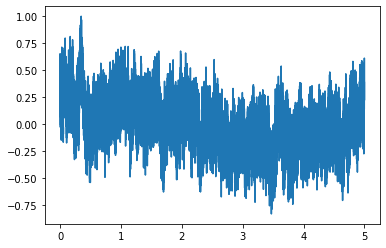

In [2]:
wave.plot()

In [3]:
import numpy as np
import scipy as sp
wave.ys

array([0.26380876, 0.36731892, 0.31655258, ..., 0.36097002, 0.22011239,
       0.38515521])

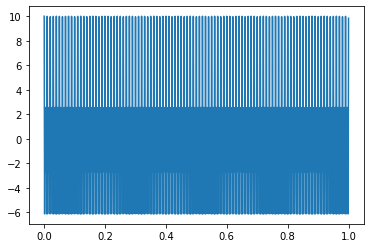

In [0]:
def synthesize1(amps, fs, ts):
    
    #  [1] List Comprehension, [2] zip function
    components= [td.CosSignal(freq, amp)
                  for amp, freq in zip(amps, fs)] 
    
    # [3] Unpacking Argument Lists
    signal= td.SumSignal(*components) 
    
    #ys = signal.evaluate(ts)
    wave= signal.make_wave()
    return wave

amps= [  1,   2,   3,   4] 
fs=   [100, 200, 300, 400]
framerate= 10000
ts= np.linspace(0, 1, framerate+1) 

w= synthesize1(amps, fs, ts)

w.plot()
w.make_audio()

In [0]:
def myzzz(sig,zamp):
    test= sig.ys / np.max(sig.ys)
    test2= sp.fftpack.dct(test, type=2)
    test2= [it for it in test2 if abs(it**2)<zamp**2]
    zzz= sp.fftpack.idct(test2, type=1)
    zzz= zzz / np.max(zzz)
    ts = np.linspace(0,1,sig.framerate)*sig.duration
    N = len(zzz)
    fs = np.arange(N)
    args= np.outer(ts, fs)
    M=    np.cos(2*np.pi*args)
    ys=   np.dot(M, zzz)
    w=    td.Wave(ys)
    return w

In [5]:
wave.make_audio()

In [12]:
ppp= myzzz(wave,np.exp(5))
ppp.make_audio()